**Describing the data**

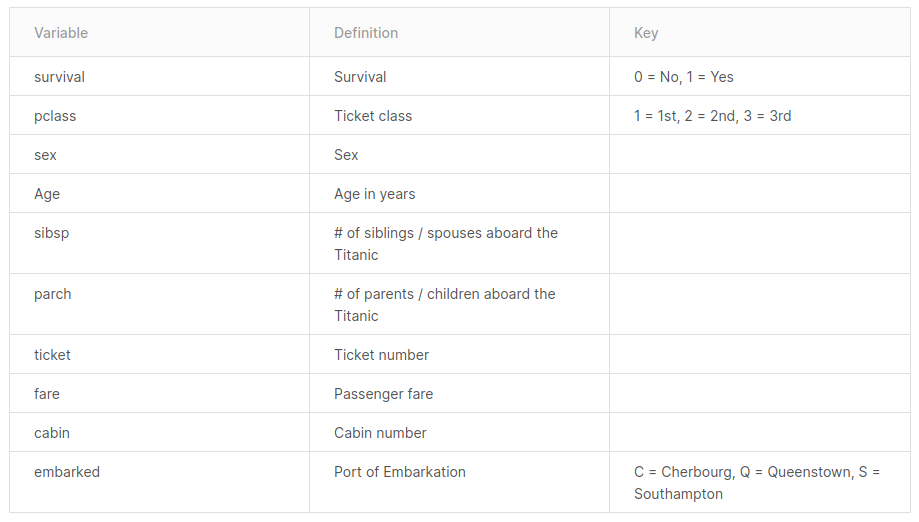

   .Image Source:https://www.kaggle.com/c/titanic/data

**Step 1 Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [ ]:
# linear algebra
import numpy as np 
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

***Step 2 Reading the data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
training = pd.read_csv('/content/drive/MyDrive/the titanic project/ titanic survivors/train.csv')
test = pd.read_csv('/content/drive/MyDrive/the titanic project/ titanic survivors/test.csv')

In [ ]:
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

***Step 3 Data Exploration***

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [ ]:
training.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


**seperate the data into numeric and categorical**

In [ ]:
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

make plots of the numeric data

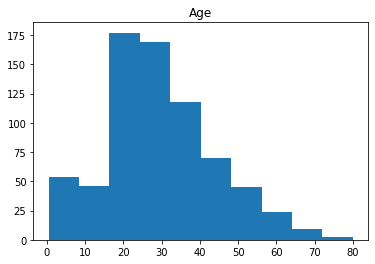

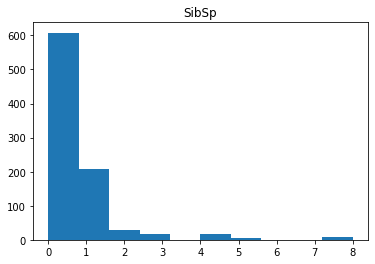

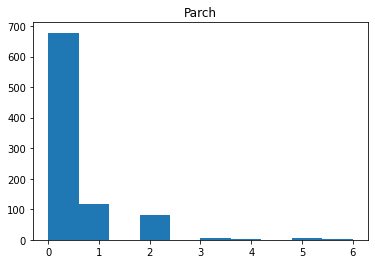

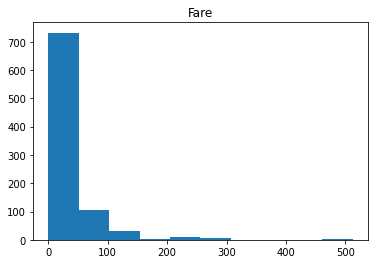

In [ ]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

**plot a correlation heatmap between the numeric columns**

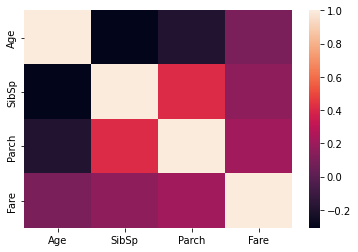

In [ ]:
sns.heatmap(df_num.corr())

we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together

**compare survival rates across the numeric variables.**

In [ ]:
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


1.  The average age of survivors is 28, so young people tend to survive
2. People who paid higher fare rates were more likely to survive.
3.    If you have parents, you had a higher chance of surviving.
4.   if you are a child, and have siblings, you have less of a chance of surviving.

**do a similar thing with our categorical variables**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


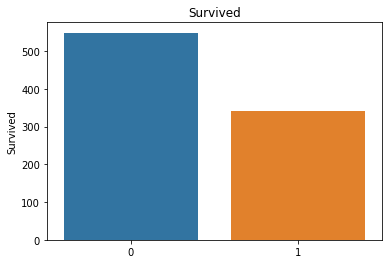

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


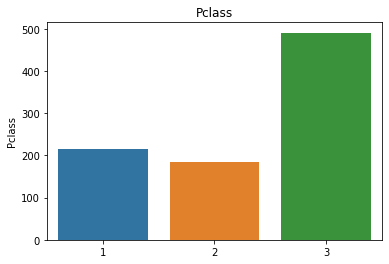

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


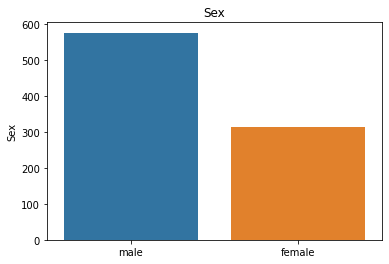

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


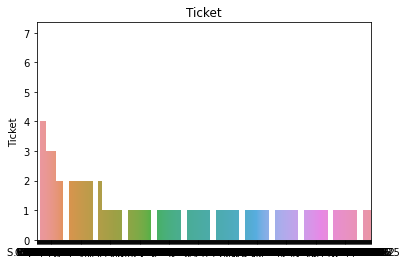

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


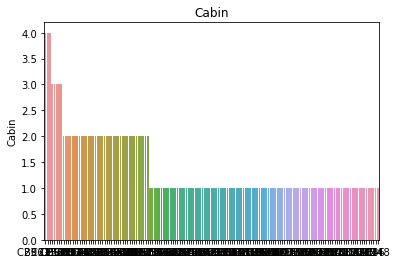

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


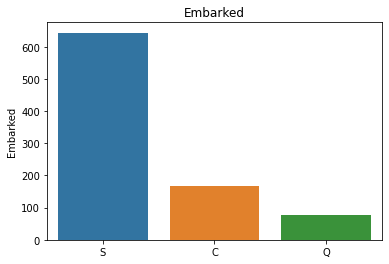

In [ ]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

1. Survived: Most of the people died in the shipwreck,  only around 300 people survived.

2. Pclass: The majority of the people traveling, had tickets to the 3rd class.
3.   Sex: There were more males than females aboard the ship, roughly double the amount.

4.   Embarked: Most of the passengers boarded the ship from Southampton.


**we will do something similar to the pivot table above, but with our categorical variables, and compare them against our dependent variable, which is if people survived:**

In [ ]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217




1. Pclass: Here we can see a lot more people survived from the First class than the Second or the Third class
2. Sex: Most of the women survived, and the majority of the male died in the shipwreck. So it looks like the saying “Woman and children first” actually applied in this scenario.


3. Embarked: This doesn’t seem much relevant, maybe if someone was from “Cherbourg” had a higher chance of surviving  
2.   List item





**Step 4: Feature Engineering**

We saw that our ticket and cabin data don’t really make sense to us, and this might hinder the performance of our model, so we have to simplify some of this data with feature engineering.

split them into individual cabins and see whether someone owned more than a single cabin.

In [ ]:
df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

It looks like the vast majority did not have individual cabins, and only a few people owned more than one cabins

let’s see whether the survival rates depend on this

In [ ]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


**let us look at the actual letter of the cabin they were in**

In [ ]:
# n stands for null
# in this case we will treat null values like it's own category
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
#comparing survival rates by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv', 
                        values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


**divide the tickets into numeric and non-numeric for efficient usage**

In [ ]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else 0)

**look at is the title of individual passengers. And whether it played any role in them getting a seat in the lifeboats.**

In [ ]:
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

Feature engineering for training

In [ ]:
training = training.copy()
# Cabin Bool
training['new_cabin_bool'] = training['Cabin'].notnull().astype('int')
# Name Count
training['new_name_count'] = training['Name'].str.len()
# Name word count
training['new_name_word_count'] = training['Name'].apply(lambda x: len(str(x).split(' ')))
# Name Dr
training['new_name_dr'] = training['Name'].apply(lambda x: len([x for x in x.split() if x.startswith('Dr.')]))
# Name title
training['new_title'] = training['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Family size
training['new_family_size'] = training['SibSp'] + training['Parch'] + 1
# Age Pclass
training['new_age_pclass'] = training['Age'] * training['Pclass']
# Is alone?
training.loc[((training['SibSp'] + training['Parch']) > 0), 'new_is_alone'] = 'No'
training.loc[((training['SibSp'] + training['Parch']) == 0), 'new_is_alone'] = 'Yes'
# Age level
training.loc[(training['Age'] < 18), 'new_age_cat'] = 'young'
training.loc[(training['Age'] >= 18) & (training['Age'] < 56), 'new_age_cat'] = 'mature'
training.loc[(training['Age'] >= 56), 'new_age_cat'] = 'senior'
# Sex-Age
training.loc[(training['Sex'] == 'male') & (training['Age'] <= 21), 'new_sex_cat'] = 'youngmale'
training.loc[(training['Sex'] == 'male') & ((training['Age'] > 21) & (training['Age'] <= 50)), 'new_sex_cat'] = 'maturemale'
training.loc[(training['Sex'] == 'male') & (training['Age'] > 50), 'new_sex_cat'] = 'seniormale'                                       
training.loc[(training['Sex'] == 'female') & (training['Age'] <= 21), 'new_sex_cat'] = 'youngfemale'
training.loc[(training['Sex'] == 'female') & ((training['Age'] > 21) & (training['Age'] <= 50)), 'new_sex_cat'] = 'maturefemale'
training.loc[(training['Sex'] == 'female') & (training['Age'] > 50), 'new_sex_cat'] = 'seniorfemale'
# Delete the variables 'Cabin', 'Name', and 'Ticket'
training.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
# Fill the missing valus of age with its median
training['Age'] = training['Age'].fillna(training.groupby('new_title')['Age'].transform('median'))
# Age Pclass
training['new_age_pclass'] = training['Age'] * training['Pclass']
# Age level
training.loc[(training['Age'] < 18), 'new_age_cat'] = 'young'
training.loc[(training['Age'] >= 18) & (training['Age'] < 56), 'new_age_cat'] = 'mature'
training.loc[(training['Age'] >= 56), 'new_age_cat'] = 'senior'
# Sex-Age
training.loc[(training['Sex'] == 'male') & (training['Age'] <= 21), 'new_sex_cat'] = 'youngmale'
training.loc[(training['Sex'] == 'male') & ((training['Age'] > 21) & (training['Age'] <= 50)), 'new_sex_cat'] = 'maturemale'
training.loc[(training['Sex'] == 'male') & (training['Age'] > 50), 'new_sex_cat'] = 'seniormale'                                       
training.loc[(training['Sex'] == 'female') & (training['Age'] <= 21), 'new_sex_cat'] = 'youngfemale'
training.loc[(training['Sex'] == 'female') & ((training['Age'] > 21) & (training['Age'] <= 50)), 'new_sex_cat'] = 'maturefemale'
training.loc[(training['Sex'] == 'female') & (training['Age'] > 50), 'new_sex_cat'] = 'seniorfemale'
# Fill the missing valus of Embarked with its mode
training = training.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == 'O' and len(x.unique()) <= 10) else x, axis=0)
training

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,...,new_cabin_bool,new_name_count,new_name_word_count,new_name_dr,new_title,new_family_size,new_age_pclass,new_is_alone,new_age_cat,new_sex_cat
0,1,0,3,male,22.0,1,0,7.2500,S,1,...,0,23,4,0,Mr,2,66.0,No,mature,maturemale
1,2,1,1,female,38.0,1,0,71.2833,C,1,...,1,51,7,0,Mrs,2,38.0,No,mature,maturefemale
2,3,1,3,female,26.0,0,0,7.9250,S,1,...,0,22,3,0,Miss,1,78.0,Yes,mature,maturefemale
3,4,1,1,female,35.0,1,0,53.1000,S,1,...,1,44,7,0,Mrs,2,35.0,No,mature,maturefemale
4,5,0,3,male,35.0,0,0,8.0500,S,1,...,0,24,4,0,Mr,1,105.0,Yes,mature,maturemale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1,...,0,21,3,0,Rev,1,54.0,Yes,mature,maturemale
887,888,1,1,female,19.0,0,0,30.0000,S,1,...,1,28,4,0,Miss,1,19.0,Yes,mature,youngfemale
888,889,0,3,female,21.0,1,2,23.4500,S,1,...,0,40,5,0,Miss,4,63.0,No,mature,youngfemale
889,890,1,1,male,26.0,0,0,30.0000,C,1,...,1,21,4,0,Mr,1,26.0,Yes,mature,maturemale


the ship was boarded by people of many different classes, this might be useful for us in our model.

In [ ]:
genders = {"male": 0, "female": 1}
training['Sex'] = training['Sex'].map(genders)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
training['Embarked'] = training['Embarked'].map(ports)

In [ ]:
training["Embarked"].fillna('S',inplace=True)

In [ ]:
training["Age"].fillna(training["Age"].mean(),inplace=True)

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Sex                  891 non-null    int64  
 4   Age                  891 non-null    float64
 5   SibSp                891 non-null    int64  
 6   Parch                891 non-null    int64  
 7   Fare                 891 non-null    float64
 8   Embarked             891 non-null    int64  
 9   train_test           891 non-null    int64  
 10  cabin_multiple       891 non-null    int64  
 11  cabin_adv            891 non-null    object 
 12  numeric_ticket       891 non-null    int64  
 13  ticket_letters       891 non-null    object 
 14  name_title           891 non-null    object 
 15  new_cabin_bool       891 non-null    int

In [ ]:
training['Age'] = training['Age'].astype(int)
training.loc[ training['Age'] <= 11, 'Age'] = 0
training.loc[(training['Age'] > 11) & (training['Age'] <= 18), 'Age'] = 1
training.loc[(training['Age'] > 18) & (training['Age'] <= 22), 'Age'] = 2
training.loc[(training['Age'] > 22) & (training['Age'] <= 27), 'Age'] = 3
training.loc[(training['Age'] > 27) & (training['Age'] <= 33), 'Age'] = 4
training.loc[(training['Age'] > 33) & (training['Age'] <= 40), 'Age'] = 5
training.loc[(training['Age'] > 40) & (training['Age'] <= 66), 'Age'] = 6
training.loc[ training['Age'] > 66, 'Age'] = 6

training['Age'].value_counts()

4    245
6    149
2    128
5    120
3    106
0     72
1     71
Name: Age, dtype: int64

In [ ]:
training.loc[ training['Fare'] <= 7.91, 'Fare'] = 0
training.loc[(training['Fare'] > 7.91) & (training['Fare'] <= 14.454), 'Fare'] = 1
training.loc[(training['Fare'] > 14.454) & (training['Fare'] <= 31), 'Fare']   = 2
training.loc[(training['Fare'] > 31) & (training['Fare'] <= 99), 'Fare']   = 3
training.loc[(training['Fare'] > 99) & (training['Fare'] <= 250), 'Fare']   = 4
training.loc[ training['Fare'] > 250, 'Fare'] = 5
training['Fare'] = training['Fare'].astype(int)
training['Fare'].value_counts()

2    229
0    223
1    217
3    169
4     44
5      9
Name: Fare, dtype: int64

In [ ]:
# Set variables for the targets and features
X = training.drop('Survived', axis=1)
y = training['Survived']

# Split the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.25, random_state=0)

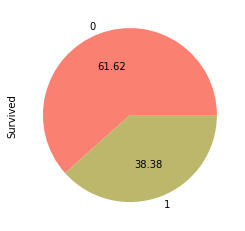

In [ ]:
y.value_counts().plot.pie(autopct='%.2f',colors=['salmon','darkkhaki'])

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_train,Y_train = oversample.fit_resample(X_train, Y_train)

In [ ]:
training = training.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
training["name_title"] = [float(str(i).replace(",", "")) for i in training["name_title"]]

ValueError: ignored

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

ValueError: ignored

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

Y_prediction = model.predict(X_test)

model.score(X_train, Y_train)
acc_model = round(model.score(X_train, Y_train) * 100, 2)

ValueError: ignored

In [ ]:
import os, sys
from scipy import stats
import numpy as np

for index, line in enumerate(open('data2.txt', 'r').readlines()):
    w = line.split(' ')
    l1 = w[1:8]
    l2 = w[8:15]

    try:
        list1 = map(float, l1)
        list2 = map(float, l2)
    except ValueError:
            print 'Line {i} is corrupt!'.format(i = index)'
        break

    result = stats.ttest_ind(list1, list2)
    print result[1]

SyntaxError: ignored